<h1 align="center">Hands-On Machine Learning | AI2YOU</font></h1>
<br>
<p style="text-align: center;align:center"><font size = 5>Linear Regression & Gradient Descent</font></p>
<h3 align="center">Zahra Amini</h3>
<br>
<br>
<br>
<br>
<br>

# PART00

# Step0: Import Libraries

In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split

import seaborn as sns

from sklearn.linear_model import LinearRegression

from sklearn import metrics

import numpy as np

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import SGDRegressor

In [2]:
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

# Step1: Read Data

In [3]:
df = pd.read_csv("houses.csv")

In [4]:
df.head()

,size(sqft),bedrooms,floors,age,price
0,952.0,2.0,1.0,65.0,271.5
1,1244.0,3.0,1.0,64.0,300.0
2,1947.0,3.0,2.0,17.0,509.8
3,1725.0,3.0,2.0,42.0,394.0
4,1959.0,3.0,2.0,15.0,540.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   size(sqft)  100 non-null    float64
 1   bedrooms    100 non-null    float64
 2   floors      100 non-null    float64
 3   age         100 non-null    float64
 4   price       100 non-null    float64
dtypes: float64(5)
memory usage: 4.0 KB


# Step2: X, y

In [7]:
X = df.drop('price', axis=1)

In [8]:
y = df['price']

In [9]:
X

,size(sqft),bedrooms,floors,age
0,952.0,2.0,1.0,65.0
1,1244.0,3.0,1.0,64.0
2,1947.0,3.0,2.0,17.0
3,1725.0,3.0,2.0,42.0
4,1959.0,3.0,2.0,15.0
...,...,...,...,...
95,1224.0,2.0,2.0,12.0
96,1432.0,2.0,1.0,43.0
97,1660.0,3.0,2.0,19.0
98,1212.0,3.0,1.0,20.0


In [10]:
y

0     271.5
1     300.0
2     509.8
3     394.0
4     540.0
      ...  
95    329.0
96    388.0
97    390.0
98    356.0
99    257.8
Name: price, Length: 100, dtype: float64

In [11]:
X.shape

(100, 4)

In [12]:
y.shape

(100,)

# Step3: Split Trainset and Testset (X_train, X_test, y_train, y_test)
<hr>
<b>from sklearn.model_selection import train_test_split</b>

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [15]:
X_train.shape

(80, 4)

In [17]:
X_test.shape

(20, 4)

In [18]:
y_train.shape

(80,)

In [19]:
y_test.shape

(20,)

# Step4: Data Visualization

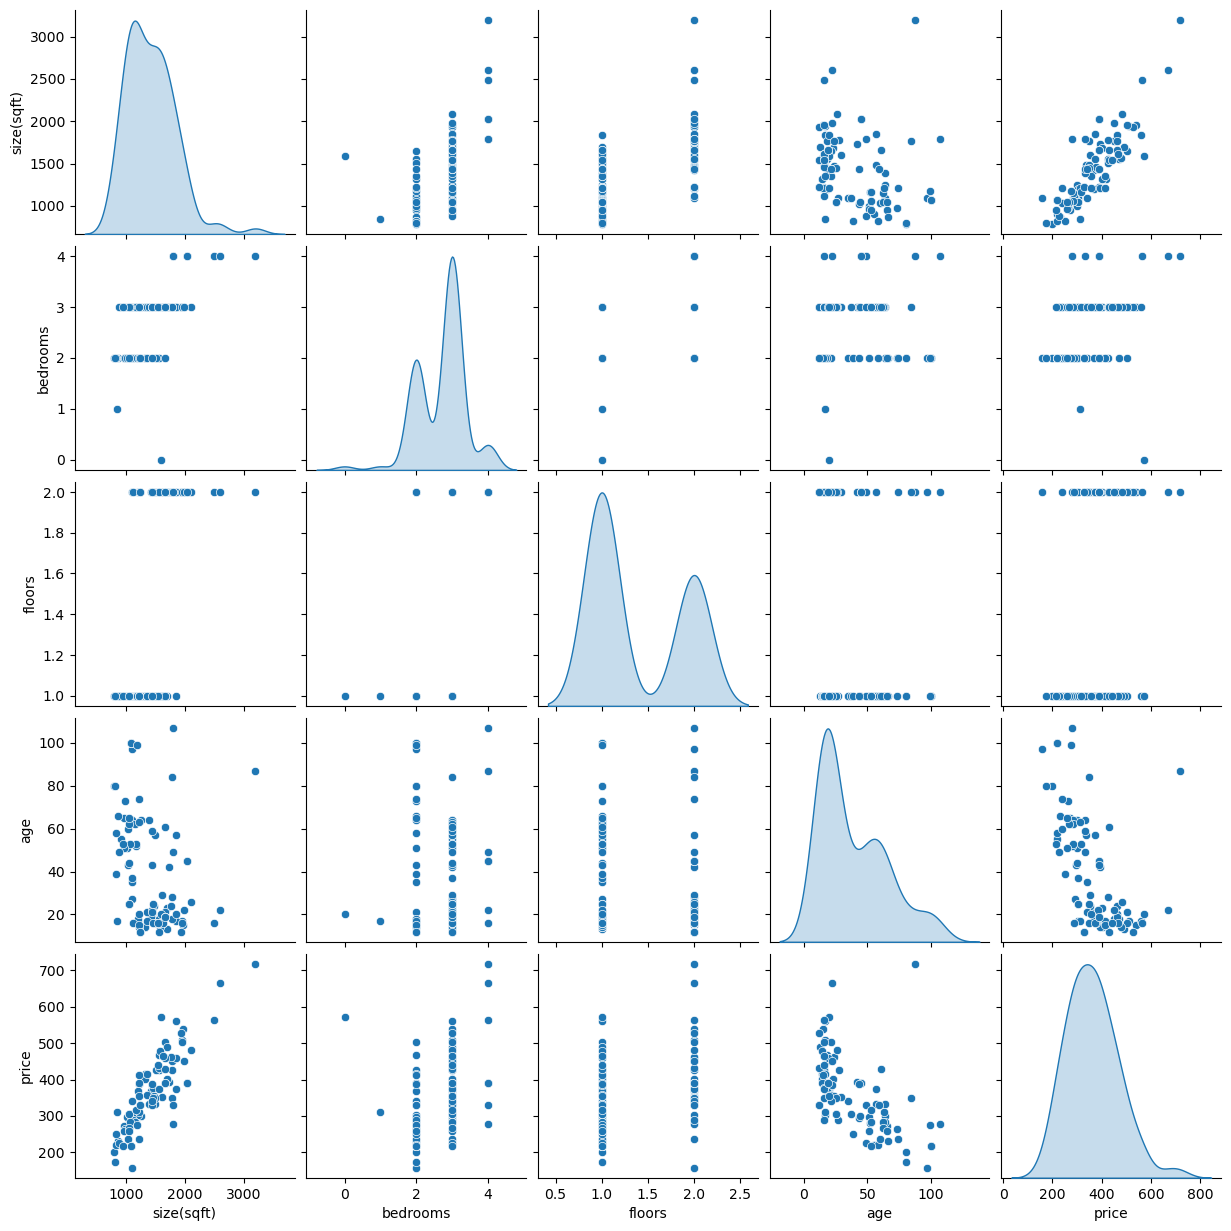

In [20]:
sns.pairplot(df, diag_kind='kde')

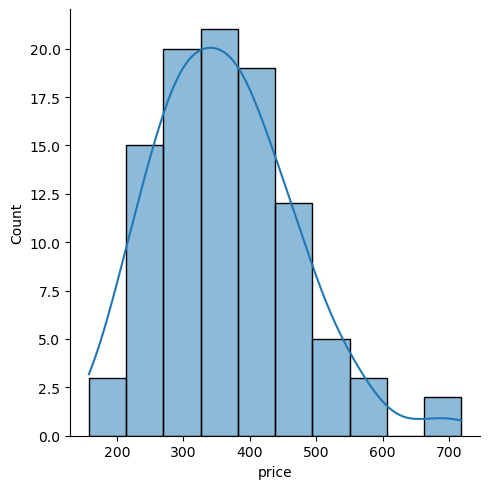

In [21]:
sns.displot(data=df, x='price', kde=True)

# PART01: LR

# Step5: Create the model
<b>linear regression</b>
<hr>
<b>from sklearn.linear_model import LinearRegression</b>

In [22]:
LR = LinearRegression()

# Step6: Training the model

In [23]:
LR.fit(X_train, y_train)

LinearRegression()

In [24]:
LR.coef_

array([  0.26618701, -33.38750502, -67.37775474,  -1.36733828])

In [25]:
LR.intercept_

222.3200392079513

# Step7: Predicting Test Data

In [26]:
y_pred = LR.predict(X_test)

In [27]:
y_pred

array([324.03661268, 298.40675938, 237.05210788, 237.05210788,
       463.06056408, 329.92190094, 403.29302292, 372.39538357,
       227.9085243 , 432.84391619, 353.09288785, 296.19540245,
       485.38783149, 615.75310485, 402.17588724, 293.51985794,
       453.81682521, 486.06581842, 389.14639819, 226.07025406])

In [28]:
y_test

16    311.800
1     300.000
43    216.960
67    216.960
89    464.000
21    340.000
97    390.000
51    334.000
6     230.000
41    390.000
82    378.000
25    304.000
45    504.000
68    666.336
37    374.000
31    280.000
50    478.000
32    526.870
3     394.000
48    220.000
Name: price, dtype: float64

# Step8: Evalutaing the Model
<hr>
<br>from sklearn import metrics</br>

In [29]:
# MSE
MSE = metrics.mean_squared_error(y_test, y_pred)
MSE

571.3096278300098

In [31]:
RMSE = np.sqrt(MSE)
RMSE

23.90208417335212

In [32]:
MAE = metrics.mean_absolute_error(y_test, y_pred)
MAE

19.05845665984373

# PART02: GD

# Step9: Scale Data
<hr>
<b>from sklearn.preprocessing import StandardScaler</b>

In [33]:
scaler = StandardScaler()

In [34]:
scaler.fit(X_train)

StandardScaler()

In [35]:
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

In [36]:
X_train_s

array([[-0.63439219,  0.46852129, -0.77459667,  0.94914845],
       [ 0.53513312,  0.46852129, -0.77459667, -0.8512981 ],
       [ 0.90657035,  0.46852129,  1.29099445, -0.53817696],
       [ 0.91660919,  0.46852129,  1.29099445,  1.81023159],
       [ 1.36584746,  0.46852129,  1.29099445, -0.81215795],
       [ 0.06832688,  0.46852129, -0.77459667, -0.69473753],
       [-0.87030503,  0.46852129, -0.77459667,  0.59688717],
       [ 0.63050214,  0.46852129, -0.77459667, -0.73387767],
       [-0.48882896, -1.09321633, -0.77459667, -0.89043824],
       [ 0.06832688,  0.46852129,  1.29099445, -0.65559739],
       [-1.30699474,  0.46852129, -0.77459667,  0.4403266 ],
       [-0.45871242, -1.09321633, -0.77459667, -0.89043824],
       [ 0.47740977, -4.21669157, -0.77459667, -0.69473753],
       [-1.00081   , -1.09321633, -0.77459667,  0.51860689],
       [-0.21778017,  0.46852129, -0.77459667, -0.92957838],
       [ 0.97182284,  2.0302589 ,  1.29099445,  0.4403266 ],
       [-1.2517811 ,  0.

# Step10: RUN GD

## Using Sklearn

### Create the model

In [43]:
sgd_reg = SGDRegressor(max_iter=10000, eta0=0.001, random_state=42)

### Training the model

In [44]:
sgd_reg.fit(X_train_s, y_train)

SGDRegressor(eta0=0.001, max_iter=10000, random_state=42)

### Predicting Test Data

In [45]:
y_pred_sgd = sgd_reg.predict(X_test_s)

In [46]:
y_pred_sgd

array([323.91648542, 298.31947028, 236.39032636, 236.39032636,
       462.47348706, 329.7624332 , 403.78265709, 371.78226164,
       228.03263312, 432.91430765, 354.09952615, 296.68643617,
       485.19545672, 614.64132977, 401.88991753, 293.72498456,
       453.35488001, 485.95000722, 389.28867317, 226.37644002])

### Evalutaing the Model

In [47]:
mae_sgd = metrics.mean_absolute_error(y_test, y_pred_sgd)

mae_sgd

19.042468687001275

In [48]:
MAE

19.05845665984373

# Finished!